Problem Statement

In the rapidly evolving world of eCommerce, accurate product categorization is crucial for ensuring seamless customer experiences, reducing search friction, and increasing product discoverability. However, the sheer volume of diverse products poses a significant challenge. Current classification systems struggle to handle ambiguities, unconventional naming conventions, and multi-language data

Develop a text classification model that categorizes products with maximum accuracy based on description of the product

Data Dictionary
1. uniq_id: 
   - Description: A unique identifier for each product.
   - Purpose: Acts as the primary key to distinguish each product record uniquely.

2. crawl_timestamp: 
   - Description: The timestamp when the product data was last scraped or collected.
   - Purpose: Helps identify the data's recency and track changes over time.

3. product_url: 
   - Description: The URL linking directly to the product's page on the eCommerce platform.
   - Purpose: Allows direct access to the product's information and purchasing page.

4. product_name: 
   - Description: The name or title of the product as displayed on the eCommerce platform.
   - Purpose: Provides a searchable and readable identification of the product.

5. product_category_tree: 
   - Description: The hierarchical structure representing the product's category on the platform.
   - Purpose: Useful for categorization, analysis, and filtering of products.

6. pid: 
   - Description: A unique identifier specific to the eCommerce platform for each product.
   - Purpose: Used to reference products internally on the platform.

7. retail_price: 
   - Description: The original or retail price of the product before any discounts.
   - Purpose: Helps understand the product's standard market value.

8. discounted_price: 
   - Description: The price of the product after applying any discounts or offers.
   - Purpose: Reflects the final price a customer would pay.
   
9. image: 
   - Description: URL linking to the main image of the product.
   - Purpose: Provides visual representation for the product.

10. is_FK_Advantage_product: 
    - Description: A boolean indicator (True/False) showinProblem Statement:


11. description: 
    - Description: Detailed information about the product, including features, specifications, and usage.
    - Purpose: Helps customers understand the product's value proposition and unique selling points.

12. product_rating: 
    - Description: The product's overall rating on the platform, based on customer reviews.
    - Purpose: Indicates customer satisfaction and product quality.

13. overall_rating: 
    - Description: The aggregate rating of the product across different platforms or periods.
    - Purpose: Offers a comprehensive view of the product's reception.

14. brand: 
    - Description: The name of the brand or manufacturer of the product.
    - Purpose: Assists in brand-based analysis and filtering.

15. product_specifications: 
    - Description: Detailed specifications of the product, often in JSON or structured format.
    - Purpose: Provides technical and functional details to aid customer decision-making.




In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report


Data Exploration and Preparation

In [11]:
df = pd.read_csv('train_product_data.csv')
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [13]:
df.shape

(14999, 15)

Exploratory Data Analysis

In [14]:
#understand the number categories and the count of products under each categories
print(df.product_category_tree.nunique())

df.product_category_tree.value_counts()

14


product_category_tree
Clothing                       5316
Jewellery                      3218
Footwear                       1083
Automotive                      937
Mobiles & Accessories           768
Home Decor & Festive Needs      714
Kitchen & Dining                610
Computers                       531
Watches                         526
Tools & Hardware                379
Toys & School Supplies          271
Pens & Stationery               264
Baby Care                       224
Bags, Wallets & Belts           158
Name: count, dtype: int64

In [15]:
df.description[0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

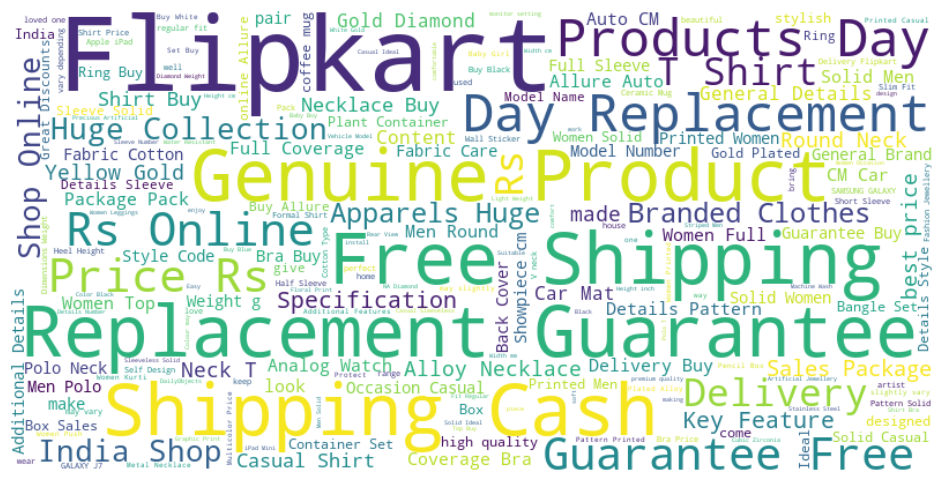

In [16]:
# Word cloud for product descriptions

all_text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

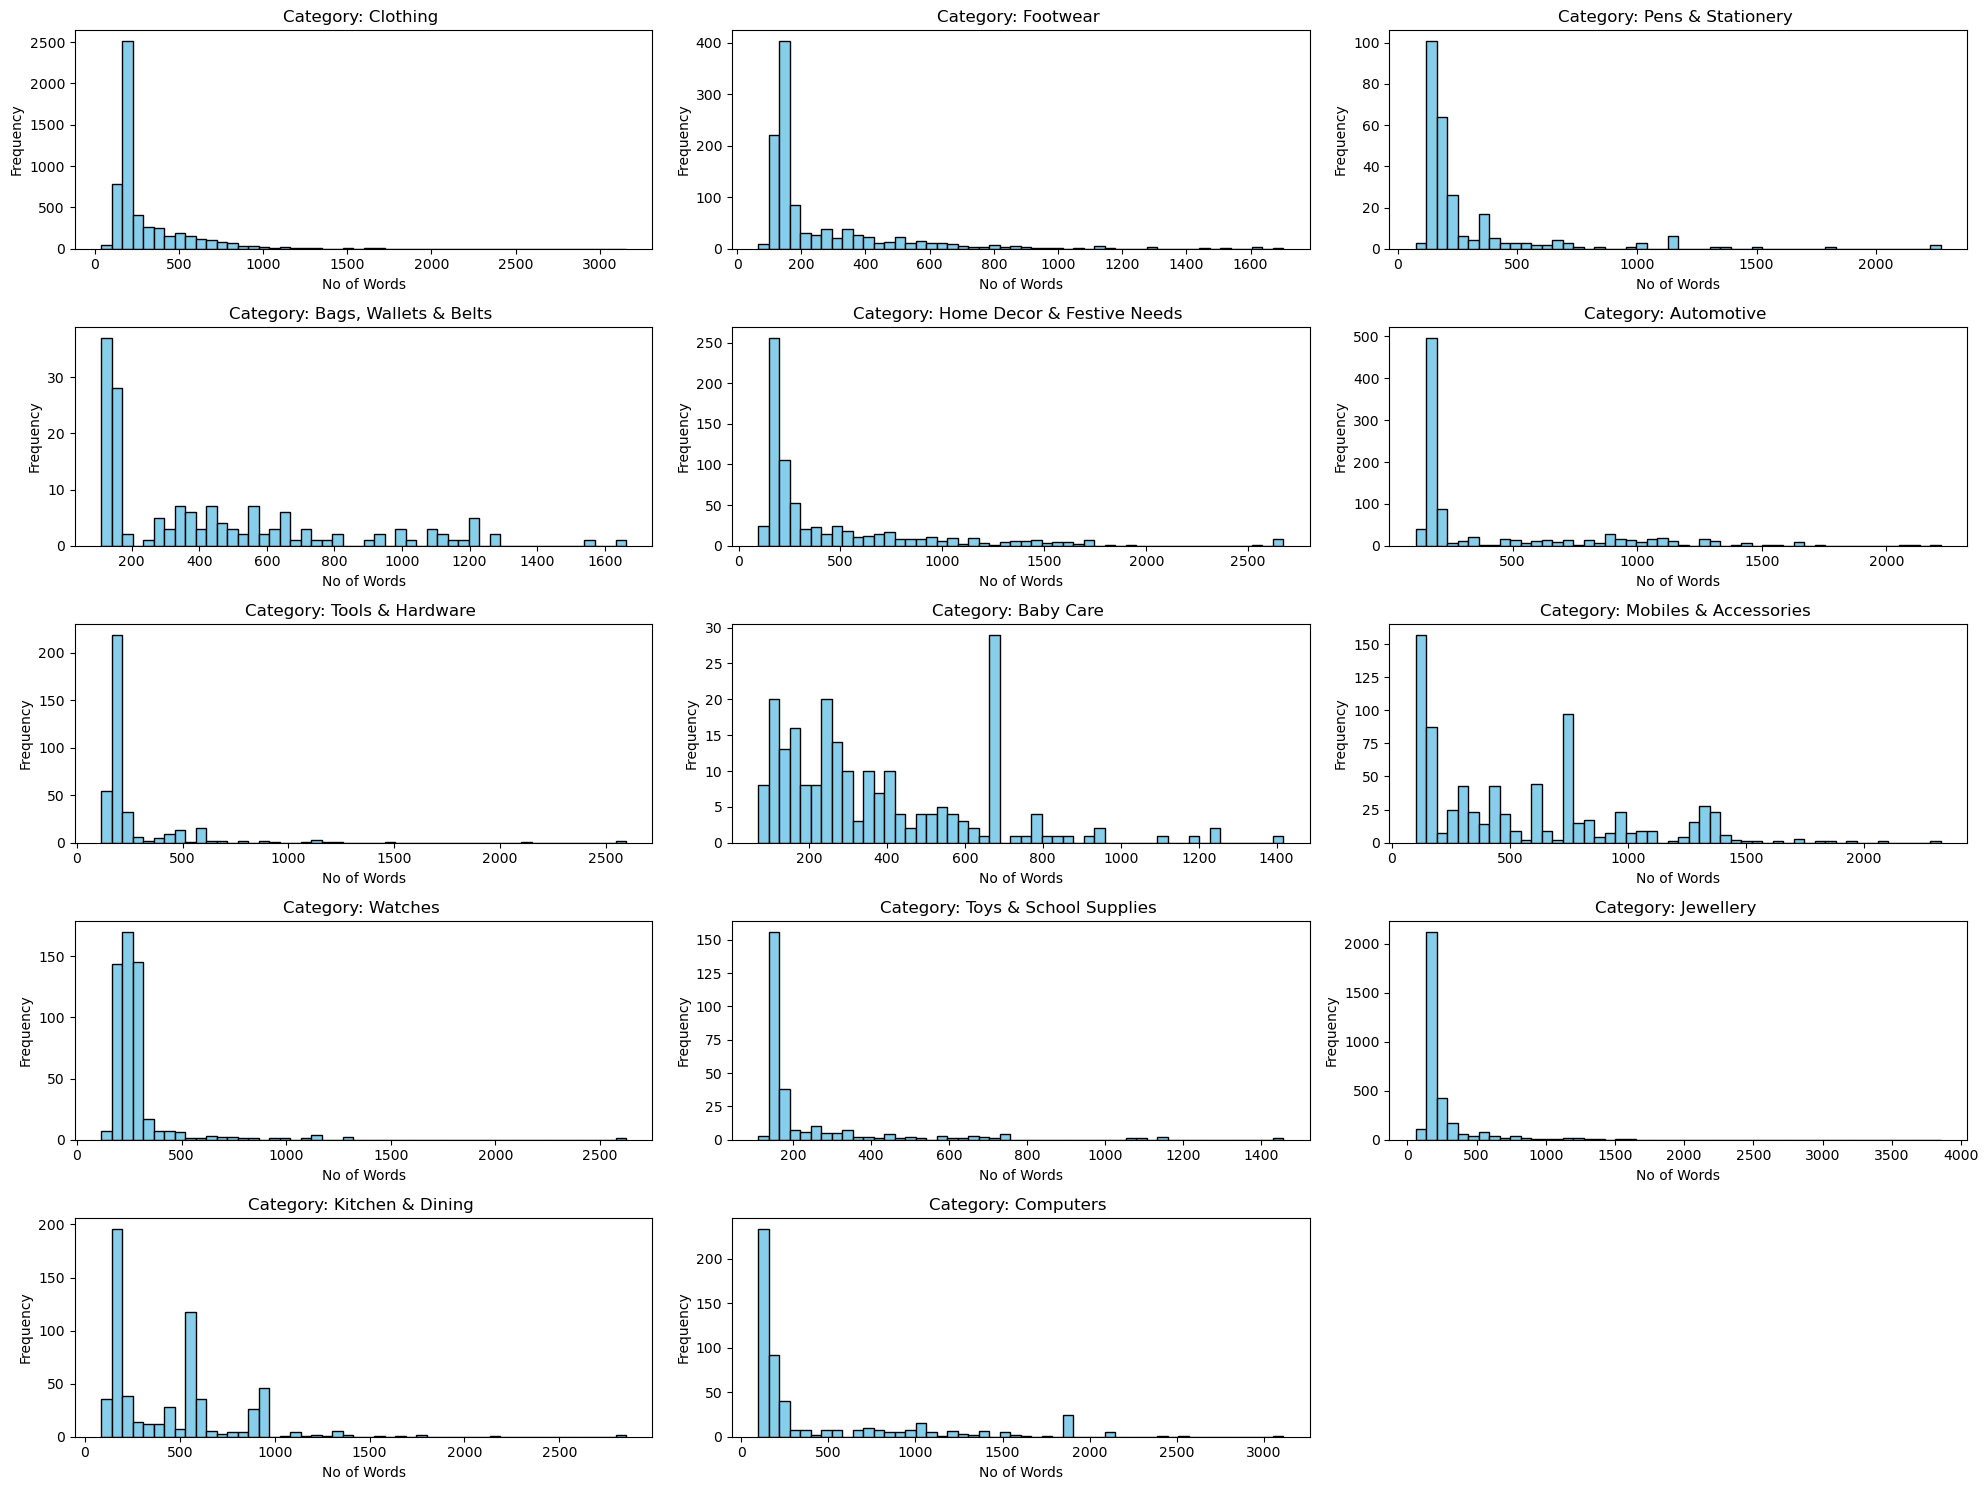

In [90]:
#Histogram for the no of words in description for each product category

df['length'] = df['description'].apply(len)
categories = df['product_category_tree'].unique()

# Plot histograms for each category
plt.figure(figsize=(20, 15))

# Define number of rows and columns for subplots based on number of categories
n_cols = 3
n_rows = (len(categories) + n_cols - 1) // n_cols

for i, category in enumerate(categories, 1):
    plt.subplot(n_rows, n_cols, i)
    category_data = df[df['product_category_tree'] == category]
    plt.hist(category_data['length'], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Category: {category}')
    plt.xlabel('No of Words')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

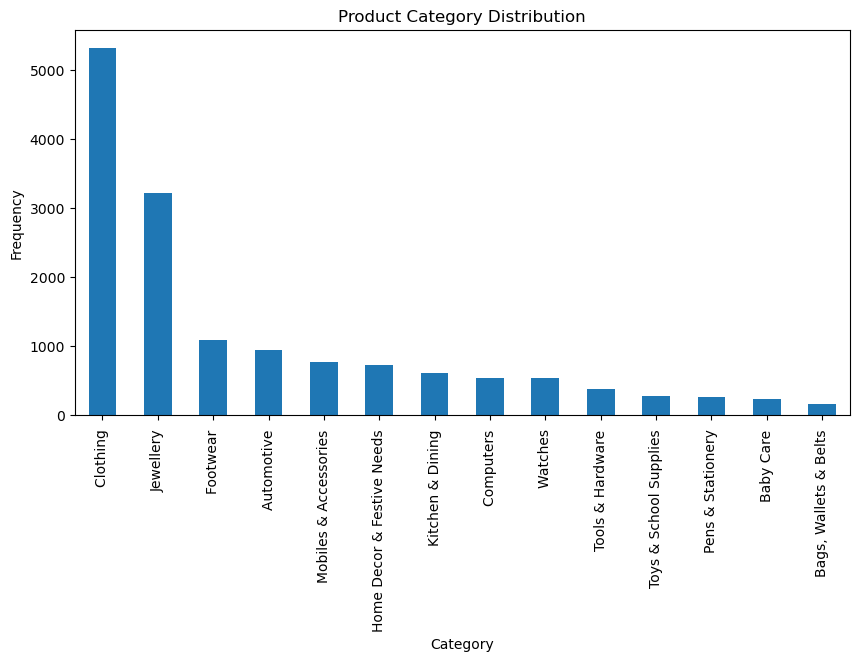

In [17]:
category_counts = df['product_category_tree'].value_counts()

#Bar plot for distribution of product catgory
plt.figure(figsize=(10, 5))
category_counts.plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Grouping categories so we can handle the class imbalance in the product_category_tree field

In [18]:
product_category_mapping = {
    'Clothing ' : 'Clothing',
    'Jewellery ': 'Accessories',
    'Footwear ' : 'Accessories',
    'Watches ': 'Accessories', 
    'Bags, Wallets & Belts ':'Accessories',
    'Automotive ': 'Automotive',
    'Mobiles & Accessories ':'Electronics',
    'Computers ': 'Electronics',
    'Home Decor & Festive Needs ':'Home & Furniture',
    'Tools & Hardware ':'Home & Furniture',
    'Kitchen & Dining ': 'Home & Furniture',
    'Toys & School Supplies ' : 'Toys & Stationery',
    'Pens & Stationery ':'Toys & Stationery',
    'Baby Care ':'Baby Care',
}
df['Merged_Category'] = df['product_category_tree'].map(product_category_mapping)
df['Merged_Category']


0           Clothing
1        Accessories
2           Clothing
3           Clothing
4        Accessories
            ...     
14994    Electronics
14995    Accessories
14996    Electronics
14997    Accessories
14998    Accessories
Name: Merged_Category, Length: 14999, dtype: object

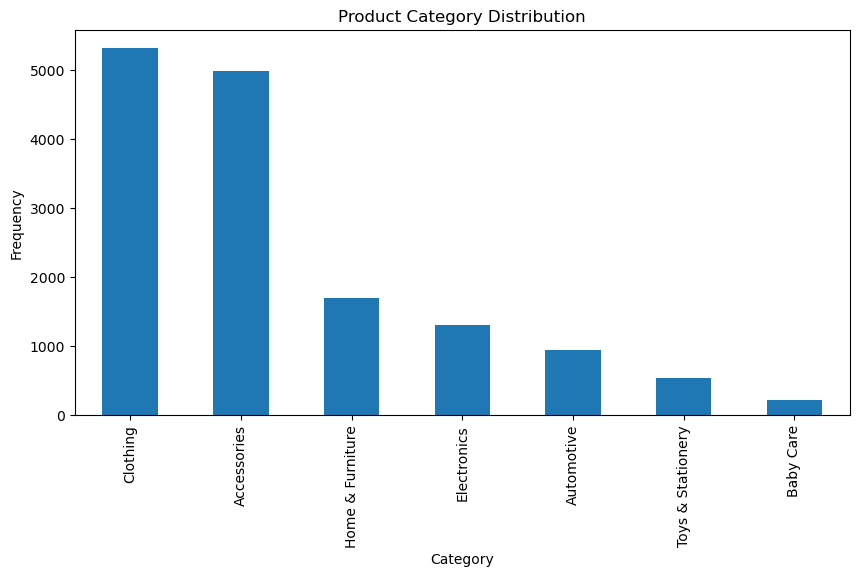

In [19]:
merged_category_counts = df['Merged_Category'].value_counts()

#Bar plot for distribution of product catgory
plt.figure(figsize=(10, 5))
merged_category_counts.plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

Data Preprocessing

In [20]:
# Drop unnecessary columns
unwanted_columns = ['uniq_id', 'crawl_timestamp', 'product_url', 'image', 'is_FK_Advantage_product', 'product_specifications']
df = df.drop(columns=unwanted_columns)


In [21]:
#check for missing values
df.isnull().sum()

product_name                0
product_category_tree       0
pid                         0
retail_price               57
discounted_price           57
description                 1
product_rating              0
overall_rating              0
brand                    4710
Merged_Category             0
dtype: int64

In [22]:
#Filling the missing values of Brand column with 'Unknown'
df['brand'].fillna('Unknown', inplace=True)

C:\Users\Dimple\AppData\Local\Temp\ipykernel_4668\2950401418.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('Unknown', inplace=True)


In [23]:
df.dropna(inplace=True)

Text Preprocessing: Clean the text by remove punctuation, stop words, bad characters, converting to lower case etc.

stemming: processing of reducing words by findig the root part of a word

In [24]:
#clean text, remove stop words and apply stemming operation 
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text)
    text = extra_symbol_remover.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

df['description'] = df['description'].apply(clean_text)

Pos Tagging : Part-of-speech (POS) tagging is the process of assigning a part of speech to each word in a sentence

In [25]:
words = df['description'][0]

nltk.pos_tag(word_tokenize(words))

[('key', 'JJ'),
 ('features', 'NNS'),
 ('alisha', 'VBP'),
 ('solid', 'JJ'),
 ('womens', 'NNS'),
 ('cycling', 'VBG'),
 ('shorts', 'NNS'),
 ('cotton', 'NN'),
 ('lycra', 'VBZ'),
 ('navy', 'RB'),
 ('red', 'JJ'),
 ('navy', 'JJ'),
 ('specifications', 'NNS'),
 ('alisha', 'VBP'),
 ('solid', 'JJ'),
 ('womens', 'NNS'),
 ('cycling', 'VBG'),
 ('shorts', 'NNS'),
 ('shorts', 'NNS'),
 ('details', 'NNS'),
 ('number', 'NN'),
 ('contents', 'NNS'),
 ('sales', 'NNS'),
 ('package', 'VBP'),
 ('pack', 'RB'),
 ('3', 'CD'),
 ('fabric', 'JJ'),
 ('cotton', 'NN'),
 ('lycra', 'NN'),
 ('type', 'NN'),
 ('cycling', 'NN'),
 ('shorts', 'VBZ'),
 ('general', 'JJ'),
 ('details', 'NNS'),
 ('pattern', 'VBP'),
 ('solid', 'JJ'),
 ('ideal', 'NN'),
 ('womens', 'NNS'),
 ('fabric', 'JJ'),
 ('care', 'NN'),
 ('gentle', 'JJ'),
 ('machine', 'NN'),
 ('wash', 'NN'),
 ('lukewarm', 'JJ'),
 ('water', 'NN'),
 ('bleach', 'VBP'),
 ('additional', 'JJ'),
 ('details', 'NNS'),
 ('style', 'NN'),
 ('code', 'NN'),
 ('altht_3p_21', 'NN'),
 ('box', '

CountVectorizer

In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(df['description'])
vector = vectorizer.transform(df['description'])

TFIDF: Extract the tfidf representation matrix of the text data:

In [27]:
tfidf_converter = TfidfTransformer()
X_tfidf = tfidf_converter.fit_transform(vector).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Splitting the data into Train and Test

In [28]:
X = df['description']
y = df['Merged_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=df['Merged_Category'], random_state=42)


In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10458,), (4483,), (10458,), (4483,))

Model Building

Logistic Regression

In [30]:
lr = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('model',LogisticRegression()),
                     ])

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred,y_test)}")
print(classification_report(y_test,y_pred))

Accuracy is : 0.9846085210796341
                   precision    recall  f1-score   support

      Accessories       0.98      1.00      0.99      1491
       Automotive       0.99      0.97      0.98       280
        Baby Care       0.98      0.72      0.83        67
         Clothing       0.99      1.00      0.99      1588
      Electronics       0.98      0.98      0.98       388
 Home & Furniture       0.96      1.00      0.98       509
Toys & Stationery       1.00      0.85      0.92       160

         accuracy                           0.98      4483
        macro avg       0.98      0.93      0.95      4483
     weighted avg       0.98      0.98      0.98      4483



SVC

In [31]:
svc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('model', SVC()),
               ])

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred,y_test)}")
print(classification_report(y_test,y_pred))

Accuracy is : 0.9899620789649788
                   precision    recall  f1-score   support

      Accessories       0.99      1.00      0.99      1491
       Automotive       1.00      0.99      0.99       280
        Baby Care       0.96      0.81      0.88        67
         Clothing       1.00      1.00      1.00      1588
      Electronics       0.99      1.00      0.99       388
 Home & Furniture       0.97      1.00      0.98       509
Toys & Stationery       1.00      0.88      0.93       160

         accuracy                           0.99      4483
        macro avg       0.99      0.95      0.97      4483
     weighted avg       0.99      0.99      0.99      4483



Random Forest Classifier

In [32]:
rf = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('model', RandomForestClassifier(n_estimators=50)),
               ])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred,y_test)}")
print(classification_report(y_test,y_pred))

Accuracy is : 0.9752397947802811
                   precision    recall  f1-score   support

      Accessories       0.98      0.99      0.98      1491
       Automotive       1.00      0.98      0.99       280
        Baby Care       0.97      0.46      0.63        67
         Clothing       0.98      1.00      0.99      1588
      Electronics       0.96      0.95      0.95       388
 Home & Furniture       0.95      0.98      0.97       509
Toys & Stationery       0.99      0.90      0.94       160

         accuracy                           0.98      4483
        macro avg       0.98      0.89      0.92      4483
     weighted avg       0.98      0.98      0.97      4483



Naive Bayes Classifier

In [33]:


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('model', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')
print(classification_report(y_test,y_pred))

accuracy 0.929957617666741
                   precision    recall  f1-score   support

      Accessories       0.88      0.99      0.93      1491
       Automotive       0.99      0.92      0.96       280
        Baby Care       0.00      0.00      0.00        67
         Clothing       0.95      1.00      0.97      1588
      Electronics       0.99      0.87      0.92       388
 Home & Furniture       0.97      0.94      0.95       509
Toys & Stationery       1.00      0.20      0.33       160

         accuracy                           0.93      4483
        macro avg       0.82      0.70      0.72      4483
     weighted avg       0.92      0.93      0.91      4483



C:\Users\Dimple\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dimple\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dimple\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting

In [34]:
gb = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', GradientBoostingClassifier(n_estimators=50)),
                    ])

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f'accuracy {accuracy_score(y_pred,y_test)}')
print(classification_report(y_test,y_pred))

accuracy 0.9739014053089449
                   precision    recall  f1-score   support

      Accessories       0.96      0.99      0.98      1491
       Automotive       0.97      0.99      0.98       280
        Baby Care       0.89      0.85      0.87        67
         Clothing       0.99      0.99      0.99      1588
      Electronics       0.99      0.92      0.95       388
 Home & Furniture       0.97      0.95      0.96       509
Toys & Stationery       0.97      0.87      0.91       160

         accuracy                           0.97      4483
        macro avg       0.96      0.94      0.95      4483
     weighted avg       0.97      0.97      0.97      4483



From all the models, the one with best accuracy score of 98.9% is SVC

In [35]:


# Define the parameter grid, using the correct step name 'svc'
param =[{ 'model__C': [0.,1,10,100], 'model__kernel': ['linear']},
             { 'model__C': [0.,1,10,100], 'model__kernel': ['rbf'], 'model__gamma' :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator= svc, param_grid= param, cv=4, verbose=2, n_jobs= -1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


C:\Users\Dimple\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dimple\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dimple\anaconda3\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Dimple\anaconda3\lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid=[{'model__C': [0.0, 1, 10, 100],
                          'model__kernel': ['linear']},
                         {'model__C': [0.0, 1, 10, 100],
                          'model__gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                          'model__kernel': ['rbf']}],
             verbose=2)

In [36]:
# Print best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'model__C': 100, 'model__gamma': 0.2, 'model__kernel': 'rbf'}
Best accuracy: 0.9891951486407212


In [113]:
best_model = grid_search.best_estimator_
best_model.fit(X_train,y_train)

best_predicted = best_model.predict(X_test)
print(f'accuracy {accuracy_score(best_predicted,y_test)}')

print(classification_report(y_test,best_predicted))

accuracy 0.9930849877314298
                   precision    recall  f1-score   support

      Accessories       1.00      1.00      1.00      1491
       Automotive       0.99      1.00      0.99       280
        Baby Care       0.97      0.90      0.93        67
         Clothing       1.00      1.00      1.00      1588
      Electronics       1.00      1.00      1.00       388
 Home & Furniture       0.97      0.99      0.98       509
Toys & Stationery       0.99      0.93      0.96       160

         accuracy                           0.99      4483
        macro avg       0.99      0.97      0.98      4483
     weighted avg       0.99      0.99      0.99      4483



So the final model is SVC with the accuracy the product descriptof, we can almost accurately predict the product category base